In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
import os
import cv2
import matplotlib.pyplot as plt
import PIL.Image as img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
train_dir = r'E:\datasets\Dataset_4_Classification\Covid19-dataset_3_classes\train'
test_dir = r'E:\datasets\Dataset_4_Classification\Covid19-dataset_3_classes\test'

In [3]:
x_train = []
for folder in os.listdir(train_dir):
    sub_path = train_dir + '/' + folder
    for image in os.listdir(sub_path):
        img_path = sub_path + '/' + image
        img = cv2.imread(img_path)
        img = cv2.resize(img,(224,224)) #VGG19 needs an input of shape 224x224
        x_train.append(img)

In [4]:
x_test = []
for folder in os.listdir(test_dir):
    sub_test = test_dir + '/' + folder
    for image in os.listdir(sub_test):
        img_test = sub_test + '/' + image
        imgtest = cv2.imread(img_test)
        imgtest = cv2.resize(imgtest,(224,224))
        x_test.append(imgtest)

In [6]:
train = np.array(x_train)/255.0
test = np.array(x_test)/255.0

In [7]:
train_data = ImageDataGenerator(rescale = 1/255.0 , validation_split=0.2)
test_data = ImageDataGenerator(rescale = 1/255.0)

In [8]:
train_set = train_data.flow_from_directory(
                    train_dir,
                    subset = 'training',
                    batch_size=32,
                    target_size=(224,224),
                    class_mode = 'sparse'
)
val_set = train_data.flow_from_directory(
                    train_dir,
                    subset = 'validation',
                    batch_size=32,
                    target_size=(224,224),
                    class_mode = 'sparse'
)
test_set = test_data.flow_from_directory(
                    test_dir,
                    batch_size=32,
                    target_size=(224,224),
                    class_mode = 'sparse'
)

Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [9]:
    y_train = train_set.classes 
    y_val = val_set.classes
    y_test = test_set.classes 
    print(train_set.class_indices)

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}


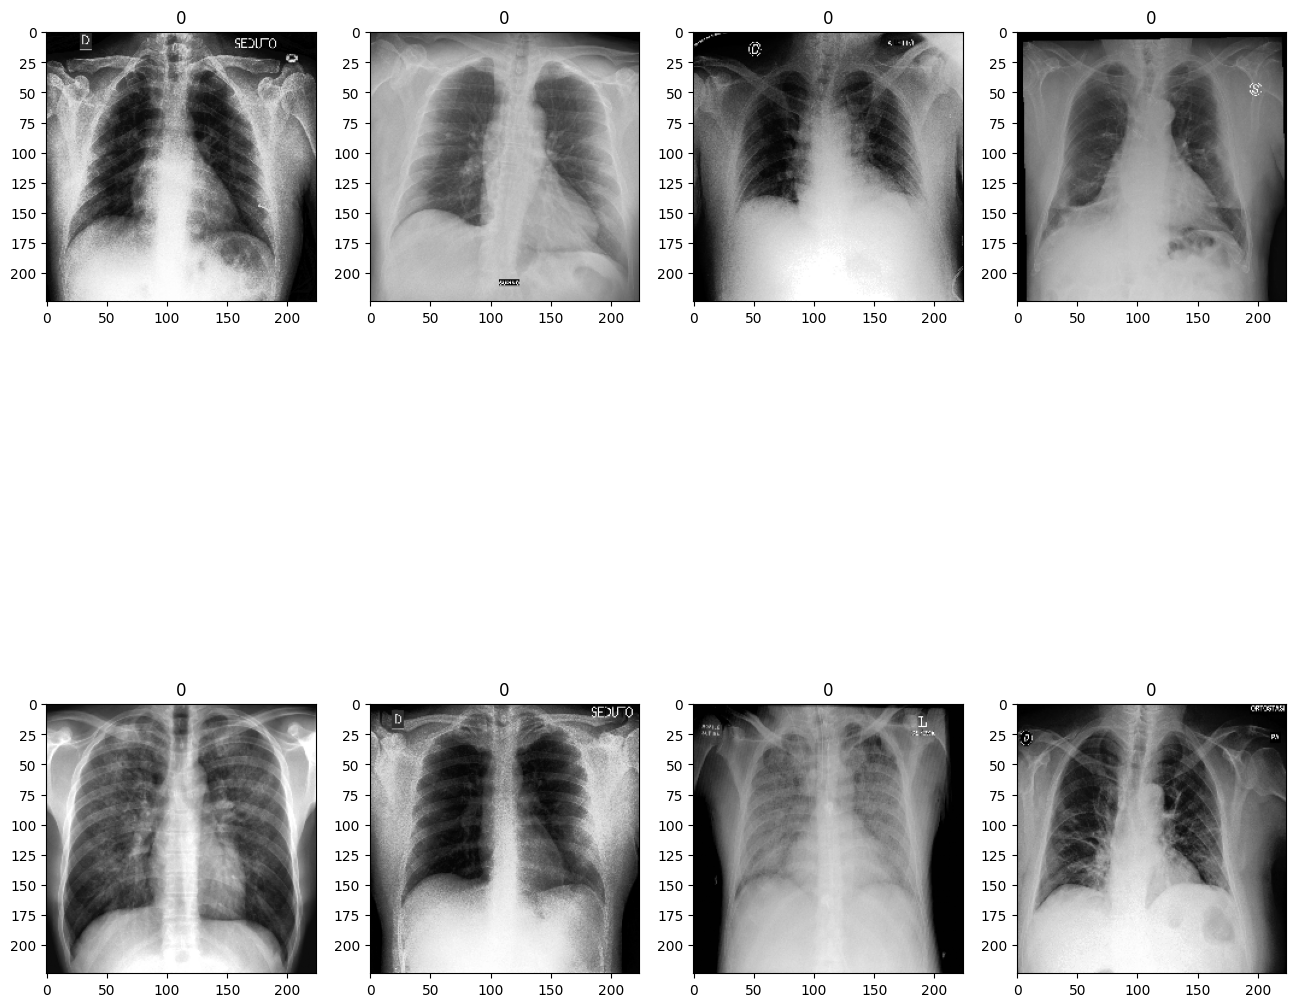

In [10]:
plt.figure(figsize=(16,16))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(train[i])
    plt.title(y_train[i])

In [11]:
vgg = VGG19(include_top = False , input_shape = (224,224,3),weights='imagenet')
for layer in vgg.layers :
    layer.trainable = False

In [12]:
ES = tf.keras.callbacks.EarlyStopping(
    patience = 10,
    min_delta = 0.001,
    verbose = 0
)
model = tf.keras.Sequential([
    layers.RandomFlip(mode='horizontal'),
    layers.RandomRotation(factor=0.2),
    vgg,
    layers.Flatten(),
    layers.Dense(3, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [13]:
training = model.fit_generator(
    train_set,
    callbacks=[ES],
    steps_per_epoch = 7 ,
    epochs = 20,
    validation_data = val_set
)

C:\Users\itska\AppData\Local\Temp\ipykernel_16616\4194417942.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model.fit_generator(


Epoch 1/20
7/7 [==============================] - 18s 3s/step - loss: 1.6929 - accuracy: 0.3831 - val_loss: 0.7254 - val_accuracy: 0.7200
Epoch 2/20
7/7 [==============================] - 17s 2s/step - loss: 0.6002 - accuracy: 0.7562 - val_loss: 0.6158 - val_accuracy: 0.7000
Epoch 3/20
7/7 [==============================] - 17s 2s/step - loss: 0.4425 - accuracy: 0.8458 - val_loss: 0.5287 - val_accuracy: 0.8000
Epoch 4/20
7/7 [==============================] - 18s 3s/step - loss: 0.3859 - accuracy: 0.8557 - val_loss: 0.4160 - val_accuracy: 0.8000
Epoch 5/20
7/7 [==============================] - 18s 3s/step - loss: 0.3244 - accuracy: 0.9055 - val_loss: 0.3567 - val_accuracy: 0.8200
Epoch 6/20
7/7 [==============================] - 18s 3s/step - loss: 0.2376 - accuracy: 0.9204 - val_loss: 0.3364 - val_accuracy: 0.8600
Epoch 7/20
7/7 [==============================] - 18s 3s/step - loss: 0.2152 - accuracy: 0.9154 - val_loss: 0.3650 - val_accuracy: 0.8000
Epoch 8/20
7/7 [==================

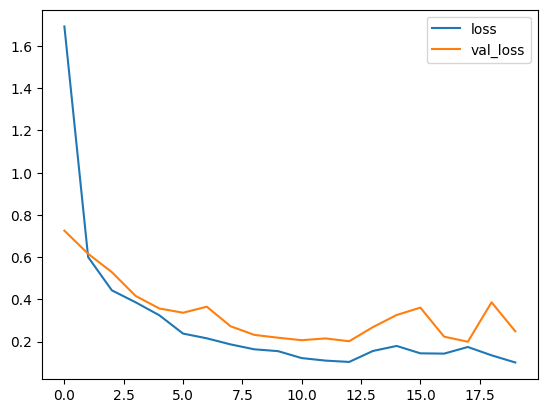

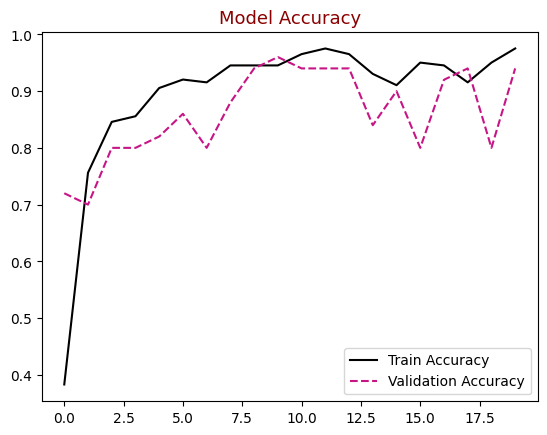

In [16]:
history_df = pd.DataFrame(training.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
plt.figure()
plt.plot(history_df.loc[:, ['accuracy']],label="Train Accuracy",color="black")
plt.plot(history_df.loc[:, ['val_accuracy']],label="Validation Accuracy",color="mediumvioletred",linestyle="dashed",markeredgecolor="purple",markeredgewidth=2)
plt.title("Model Accuracy",color="darkred",size=13)
plt.legend()
plt.show()

model.save('your_model.h5')

In [17]:
model.save('your_model.h5')

e:\tensorflow\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
model.save('your_model.keras')

In [52]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load your test images and labels
# Replace `test` and `y_test` with your actual data

# Define the function for FGSM to generate adversarial images
def fgsm(model, image, true_label, epsilon):
    image_tensor = tf.convert_to_tensor(image)
    
    # Preprocess the input image to match the expected shape
    image_tensor = tf.image.resize(image_tensor, (224, 224))
    image_tensor = tf.expand_dims(image_tensor, axis=0)
    
    with tf.GradientTape() as tape:
        tape.watch(image_tensor)
        prediction = model(image_tensor, training=False)
        loss = tf.keras.losses.sparse_categorical_crossentropy(true_label, prediction)

    gradient = tape.gradient(loss, image_tensor)
    signed_grad = tf.sign(gradient)
    adversarial_image = image_tensor + epsilon * signed_grad
    
    # Get the perturbed image as a NumPy array
    adversarial_image = adversarial_image.numpy()
    
    # Ensure the shape is (224, 224, 3)
    adversarial_image = np.squeeze(adversarial_image, axis=0)
    
    return adversarial_image

# Add perturbations to the test images
epsilon = 0.009 # Adjust the epsilon value to control perturbation
perturbed_test_images = [fgsm(model, image, true_label, epsilon) for image, true_label in zip(test, y_test)]

# Predict on perturbed test images
perturbed_test_predictions = model.predict(np.array(perturbed_test_images))
perturbed_test_predicted_labels = np.argmax(perturbed_test_predictions, axis=1)




3/3 [==============================] - 4s 1s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Accuracy on perturbed test images: 0.00%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


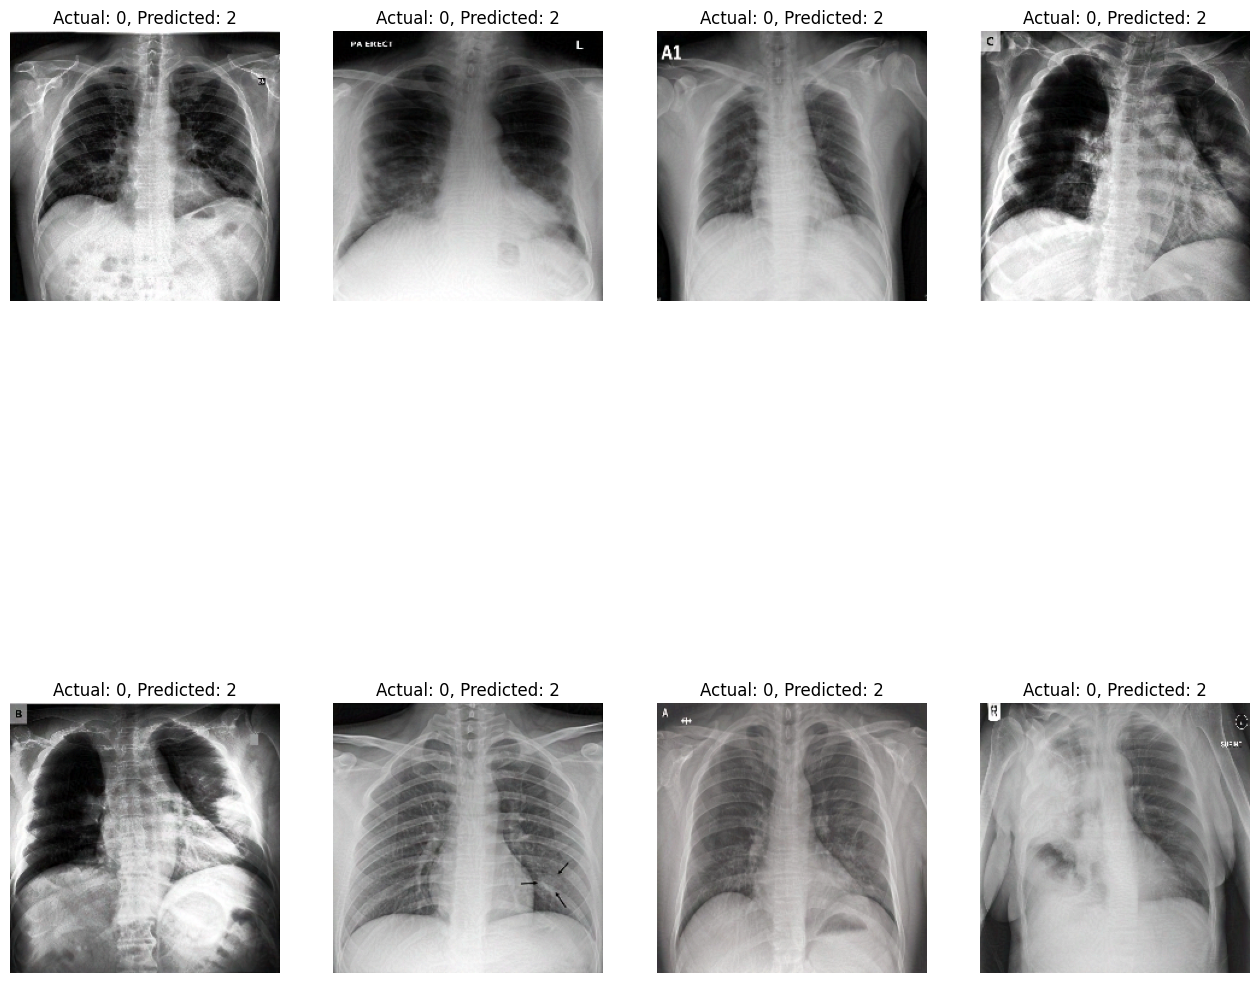

In [53]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, perturbed_test_predicted_labels)
print("Accuracy on perturbed test images: {:.2f}%".format(accuracy * 100))

# Plot perturbed test images with actual and predicted labels
plt.figure(figsize=(16, 16))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(perturbed_test_images[i])
    plt.title("Actual: {}, Predicted: {}".format(y_test[i], perturbed_test_predicted_labels[i]))
    plt.axis('off')
plt.show()